# THE SPARKS FOUNDATION

## DATA SCIENCE and BUSINESS ANALYTICS INTERNSHIP (GRIP MARCH '21)

### NAME: SHUBHAM UTTAMKUMAR DEY

### Task 1 --> Prediction using Supervised ML 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Problem Statement: What will be the student's score on the number of hours studied?.

In [19]:
#importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10,5]

In [5]:
#Read data

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#The number of rows and columns in data
df.shape

(25, 2)

In [8]:
#Get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# Descriptive statistics of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
# Finding the null values in the dataset 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there are no null values we can go ahead and create our model

### Visualization of the Data

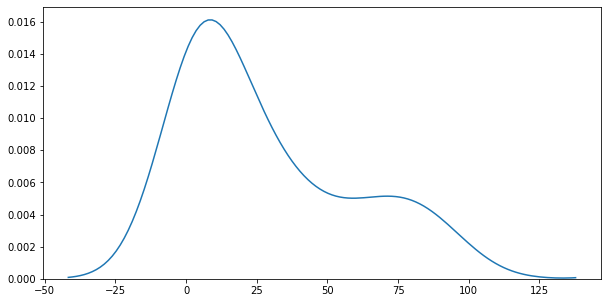

In [20]:
# checking the distribution of the data.
sns.distplot(df,hist=False)

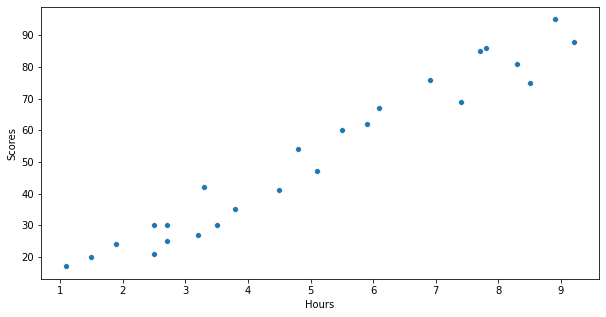

In [21]:
# Plotting the data points
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.show()

From the above graph we can see a positive linear relationship between Hours and Scores

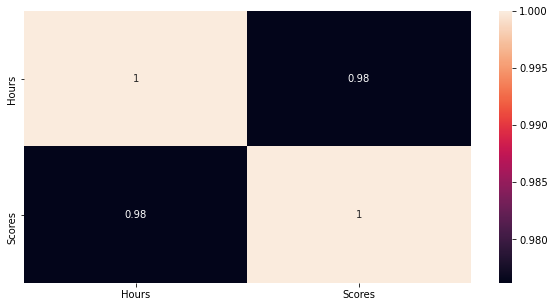

In [28]:
#Checking correlation of the data
cor = df.corr()
sns.heatmap(cor,annot=True)

### Data Preparation

In [29]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [77]:
#Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Data

In [78]:
#Training the data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

### Model Visualization

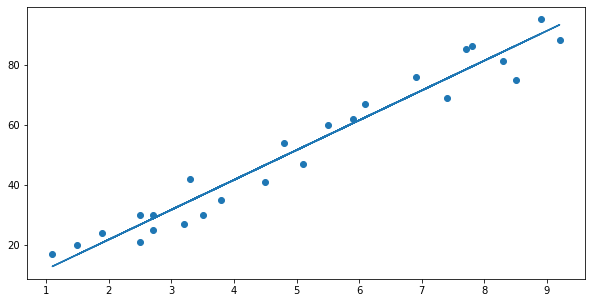

In [79]:
line = linreg.coef_ * X + linreg.intercept_

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Model Prediction

In [80]:
y_pred = linreg.predict(X_test)

In [81]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [82]:
final = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
final

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation

In [84]:
from sklearn.metrics import r2_score
print('R2 score',r2_score(y_test,y_pred))

R2 score 0.9454906892105356


In [85]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error 4.183859899002975


The R2score and MAE shows that how well the model fits the data

#### What would be the predicted score if a student studies for 9.25 hours a day

In [83]:
#using the model for our problem statement
h = 9.25
own_score = linreg.predict([[h]])
print('Hours studied',h)
print('Predicted Score',own_score)

Hours studied 9.25
Predicted Score [93.69173249]


We can see that if a student studies for 9.25 hours a day the predicted score can 93.69173249